In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

## Breast Cancer Wisconsin Dataset

https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
cancer.target_names, df.shape

In [ ]:
df.info()

In [ ]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_data = scaler.transform(df.drop('target', axis=1))

In [ ]:
pd.DataFrame(scaled_data).head()

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [ ]:
pd.DataFrame(x_pca)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Wine Dataset

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

In [ ]:
sns.pairplot(df)

In [ ]:
col_names = list(wine.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[wine.data, wine.target], columns=col_names)
df.head()

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
x_pca = pd.DataFrame(pca.transform(df_scaled), columns=['PCA1', 'PCA2'])

In [ ]:
sns.scatterplot(x_pca.PCA1, y=x_pca.PCA2, hue=wine.target_names[wine.target])

## Iris Data

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


col_names = list(iris.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=col_names)
df.head()

In [ ]:
sns.heatmap(df.drop(columns="target").corr(), annot=True) 

In [ ]:
pca = PCA(n_components=2)
pca.fit(df.drop(columns="target"))
x_pca = pd.DataFrame(pca.transform(df.drop(columns="target")), columns=['PCA1', 'PCA2'])
sns.scatterplot(x_pca.PCA1, y=x_pca.PCA2, hue=iris.target_names[iris.target])

## Digits

(1797, 64)


<Figure size 432x288 with 0 Axes>

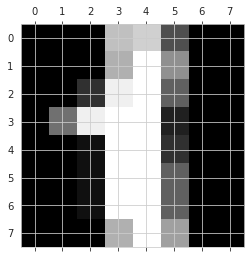

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()

print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[1]);

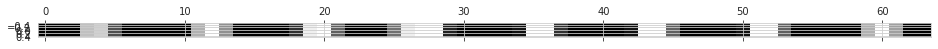

In [8]:
plt.matshow(digits.images[1].reshape(1,64)) 

In [9]:
digits.images[1].reshape(1,64)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [10]:
digits.images.reshape(1797,64)[1,:]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

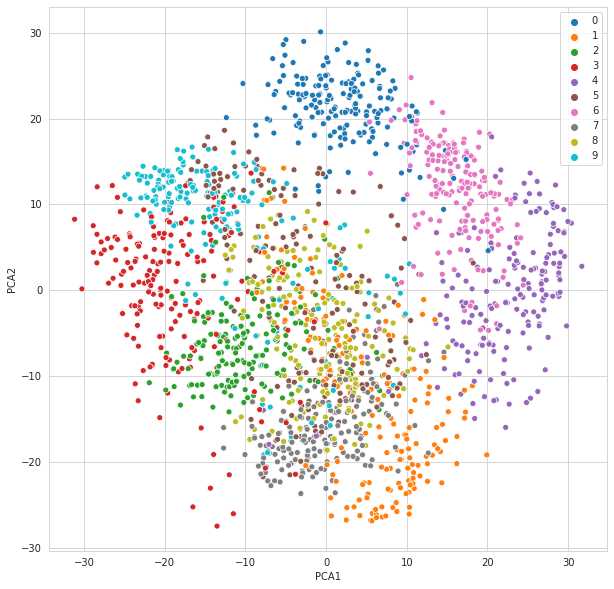

In [17]:
pca = PCA(n_components=2)
pca.fit(digits.images.reshape(1797,64))
x_pca = pd.DataFrame(pca.transform(digits.images.reshape(1797,64)), columns=['PCA1', 'PCA2'])

plt.figure(figsize=(10,10)) 
sns.scatterplot(x_pca.PCA1, y=x_pca.PCA2, hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

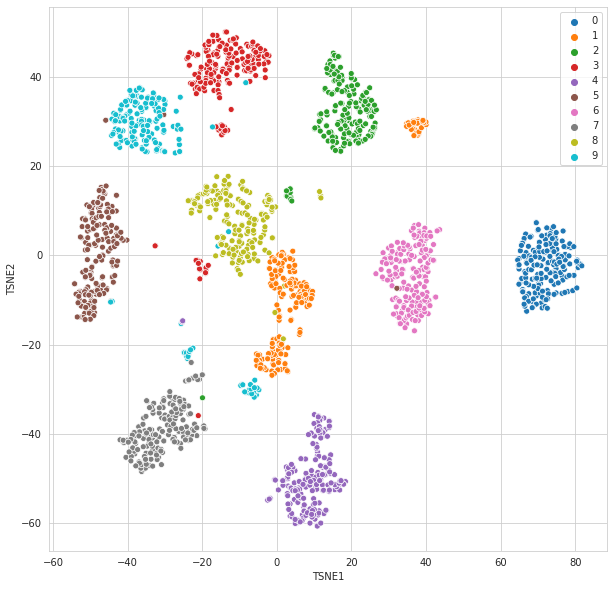

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

x_tsne = pd.DataFrame(tsne.fit_transform(digits.images.reshape(1797,64)), columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(10,10)) 
sns.scatterplot(x_tsne.TSNE1, y=x_tsne.TSNE2, hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

## Protein Expression

## Movie Reviews

## Final Remarks